SITUAÇÂO:  Carregar os dados do ENEM que estão em CSV para uma base SQL server e criar relatórios no power bi sobre eles

Link para o CSV [https://download.inep.gov.br/microdados/microdados\_enem\_2020.zip](https://download.inep.gov.br/microdados/microdados_enem_2020.zip)

In [4]:
IF NOT EXISTS 
(SELECT name FROM SYSDATABASES WHERE name='STG_ENEM')
CREATE DATABASE STG_ENEM

Commands completed successfully.

Total execution time: 00:00:00.009

In [7]:
USE STG_ENEM
GO

Commands completed successfully.

Total execution time: 00:00:00.001

In [ ]:
SELECT * FROM STG_ENEM.dbo.MICRODADOS_ENEM_2020
GO

**CRIAR TABELA DE LOG**

In [8]:
IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='LOG_CARGAS_TABELAS' AND xtype='U')
CREATE TABLE [dbo].[LOG_CARGAS_TABELAS](
	[ID] [int] IDENTITY(1,1) NOT NULL,
	[NUMERO_ERRO] [int] NULL,
	[SERVERIDADE_ERRO] [int] NULL,
	[ESTADO_ERRO] [int] NULL,
	[PROC_ERRO] [nvarchar](255) NULL,
	[LINHA_ERRO] [int] NULL,
	[MSG_ERRO] [nvarchar](255) NULL,
	[SITUACAO] [nvarchar](10) NULL,
	[PROCESSO] [nvarchar](30) NULL,
	[DATA_INI] [datetime] NULL,
	[DATA_FIM] [datetime] NULL,
	[LINHAS_AFETADAS] [int] NULL,
	[ACAO] [nvarchar](10) NULL,
	[DESTINO] [varchar](30) NULL,
PRIMARY KEY CLUSTERED 
(
	[ID] ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.020

**CRIANDO AS DIMENSÕES**

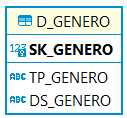

In [9]:
USE STG_ENEM
GO
IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='D_GENERO' AND xtype='U')
CREATE TABLE [dbo].[D_GENERO](
	SK_GENERO [int] IDENTITY(1,1) NOT NULL,
	TP_GENERO [char](1) NOT NULL,
	DS_GENERO [varchar] (10) NOT NULL,
PRIMARY KEY CLUSTERED 
(
	SK_GENERO ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.007

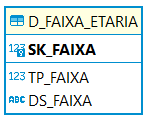

In [14]:
IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='D_FAIXA_ETARIA' AND xtype='U')
CREATE TABLE [dbo].[D_FAIXA_ETARIA](
	SK_FAIXA [int] IDENTITY(1,1) NOT NULL,
	TP_FAIXA [int] NOT NULL,
	DS_FAIXA [varchar] (30) NOT NULL,
PRIMARY KEY CLUSTERED 
(
	SK_FAIXA ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.012

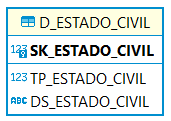

In [17]:
IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='D_ESTADO_CIVIL' AND xtype='U')
CREATE TABLE [dbo].[D_ESTADO_CIVIL](
	SK_ESTADO_CIVIL [int] IDENTITY(1,1) NOT NULL,
	TP_ESTADO_CIVIL [int] NOT NULL,
	DS_ESTADO_CIVIL [varchar] (50) NOT NULL,
PRIMARY KEY CLUSTERED 
(
	SK_ESTADO_CIVIL ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.017

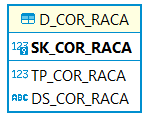

In [19]:
IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='D_COR_RACA' AND xtype='U')
CREATE TABLE [dbo].[D_COR_RACA](
	SK_COR_RACA [int] IDENTITY(1,1) NOT NULL,
	TP_COR_RACA [int] NOT NULL,
	DS_COR_RACA [varchar] (50) NOT NULL,
PRIMARY KEY CLUSTERED 
(
	SK_COR_RACA ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.020

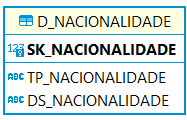

In [21]:
IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='D_NACIONALIDADE' AND xtype='U')
CREATE TABLE [dbo].[D_NACIONALIDADE](
	SK_NACIONALIDADE [int] IDENTITY(1,1) NOT NULL,
	TP_NACIONALIDADE [varchar] NOT NULL,
	DS_NACIONALIDADE [varchar] (50) NOT NULL,
PRIMARY KEY CLUSTERED 
(
	SK_NACIONALIDADE ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.010

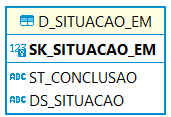

In [47]:
IF EXISTS
  (SELECT * FROM sysobjects WHERE name='D_SITUACAO_EM' AND xtype='U')
DROP TABLE D_SITUACAO_EM  
CREATE TABLE [dbo].[D_SITUACAO_EM](
	SK_SITUACAO_EM [int] IDENTITY(1,1) NOT NULL,
	ST_CONCLUSAO [varchar] NOT NULL,
    DS_SITUACAO [varchar] (100) NOT NULL,    
PRIMARY KEY CLUSTERED 
(
	SK_SITUACAO_EM ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.007

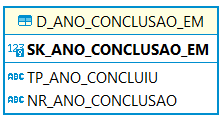

In [48]:
IF EXISTS
  (SELECT * FROM sysobjects WHERE name='D_ANO_CONCLUSAO_EM' AND xtype='U')
DROP TABLE D_ANO_CONCLUSAO_EM
CREATE TABLE [dbo].[D_ANO_CONCLUSAO_EM](
	SK_ANO_CONCLUSAO_EM [int] IDENTITY(1,1) NOT NULL,	
    TP_ANO_CONCLUIU [varchar](5) NULL,
	NR_ANO_CONCLUSAO [varchar](50) NULL,
PRIMARY KEY CLUSTERED 
(
	SK_ANO_CONCLUSAO_EM ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.006

In [54]:
IF EXISTS
  (SELECT * FROM sysobjects WHERE name='D_TP_ESCOLA_EM' AND xtype='U')
  DROP TABLE D_TP_ESCOLA_EM
CREATE TABLE [dbo].[D_TP_ESCOLA_EM](
	SK_TP_ESCOLA_EM [int] IDENTITY(1,1) NOT NULL,	
    TP_ESCOLA [int] NULL,
	DS_ESCOLA [varchar](50) NULL,
PRIMARY KEY CLUSTERED 
(
	SK_TP_ESCOLA_EM ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.016

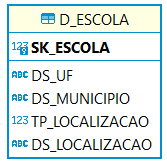

In [20]:
IF EXISTS
  (SELECT * FROM sysobjects WHERE name='D_ESCOLA' AND xtype='U')
DROP TABLE D_ESCOLA
CREATE TABLE [dbo].[D_ESCOLA](
	SK_ESCOLA [int] IDENTITY(1,1) NOT NULL,
	DS_UF [varchar](2) NULL,
  DS_MUNICIPIO [varchar] (100) NULL,	
  TP_LOCALIZACAO [int] NULL,
  DS_LOCALIZACAO [varchar](20) NULL,
PRIMARY KEY CLUSTERED 
(
	SK_ESCOLA ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.011

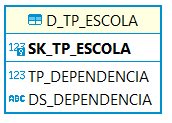

In [16]:
IF EXISTS
  (SELECT * FROM sysobjects WHERE name='D_TP_ESCOLA' AND xtype='U')
DROP TABLE D_TP_ESCOLA
CREATE TABLE [dbo].[D_TP_ESCOLA](
	SK_TP_ESCOLA [int] IDENTITY(1,1) NOT NULL,	
	TP_DEPENDENCIA [int] NULL,
    DS_DEPENDENCIA [varchar] (10) NULL,  
PRIMARY KEY CLUSTERED 
(
	SK_TP_ESCOLA ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.051

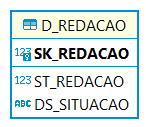

In [60]:
IF EXISTS
  (SELECT * FROM sysobjects WHERE name='D_REDACAO' AND xtype='U')
  DROP TABLE D_REDACAO
CREATE TABLE [dbo].[D_REDACAO](
	SK_REDACAO [int] IDENTITY(1,1) NOT NULL,
	ST_REDACAO [int] NULL,
    DS_SITUACAO [varchar] (50) NULL,
PRIMARY KEY CLUSTERED 
(
	SK_REDACAO ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.007

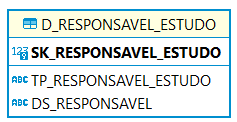

In [63]:
IF EXISTS
  (SELECT * FROM sysobjects WHERE name='D_RESPONSAVEL_ESTUDO' AND xtype='U')
  DROP TABLE D_RESPONSAVEL_ESTUDO
CREATE TABLE [dbo].[D_RESPONSAVEL_ESTUDO](
	SK_RESPONSAVEL_ESTUDO [int] IDENTITY(1,1) NOT NULL,
	TP_RESPONSAVEL_ESTUDO [varchar] NULL,
    DS_RESPONSAVEL [varchar] (100) NULL,
PRIMARY KEY CLUSTERED 
(
	SK_RESPONSAVEL_ESTUDO ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.014

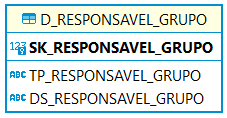

In [72]:
IF EXISTS
  (SELECT * FROM sysobjects WHERE name='D_RESPONSAVEL_GRUPO' AND xtype='U')
  DROP TABLE D_RESPONSAVEL_GRUPO
CREATE TABLE [dbo].[D_RESPONSAVEL_GRUPO](
	SK_RESPONSAVEL_GRUPO [int] IDENTITY(1,1) NOT NULL,
	TP_RESPONSAVEL_GRUPO [char](1) NULL,
    DS_RESPONSAVEL_GRUPO [varchar] (500) NULL,
PRIMARY KEY CLUSTERED 
(
	SK_RESPONSAVEL_GRUPO ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.005

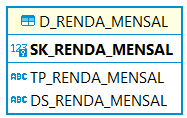

In [76]:
IF EXISTS
  (SELECT * FROM sysobjects WHERE name='D_RENDA_MENSAL' AND xtype='U')
  DROP TABLE D_RENDA_MENSAL
CREATE TABLE [dbo].[D_RENDA_MENSAL](
	SK_RENDA_MENSAL [int] IDENTITY(1,1) NOT NULL,
	TP_RENDA_MENSAL [char](1) NULL,
    DS_RENDA_MENSAL [varchar] (200) NULL,
PRIMARY KEY CLUSTERED 
(
	SK_RENDA_MENSAL ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Total execution time: 00:00:00.009

In [14]:
USE STG_ENEM
GO
IF EXISTS
  (SELECT * FROM sysobjects WHERE name='F_ENEM' AND xtype='U')
  DROP TABLE F_ENEM
CREATE TABLE [dbo].[F_ENEM](
	SK_ENEM [int] IDENTITY(1,1) NOT NULL,
	NU_INSCRICAO [varchar](12) NOT NULL,
    TP_FAIXA_ETARIA [varchar](5) NULL,
    TP_SEXO [varchar](5) NULL,
    TP_ESTADO_CIVIL [varchar](5) NULL,
    TP_COR_RACA [varchar](5) NULL,
    TP_NACIONALIDADE [varchar](5) NULL,
    TP_ST_CONCLUSAO [varchar](5) NULL,
    TP_ANO_CONCLUIU [varchar](5) NULL,
    TP_ESCOLA [varchar](5) NULL,
    SG_UF_ESC [varchar] (2) NULL,
    NO_MUNICIPIO_ESC [varchar](100) NULL,
    TP_LOCALIZACAO [varchar](5) NULL,
    TP_STATUS_REDACAO [varchar] (5)NULL,
    NU_NOTA_REDACAO [numeric](9) NULL,
    RESPONSAVEL_PAI [varchar] (5)NULL,
    RESPONSAVEL_MAE [varchar] (5)NULL,
    RESPONSAVEL_PAI_GRUPO [varchar](5) NULL,
    RESPONSAVEL_MAE_GRUPO [varchar](5) NULL,
    RENDA_MENSAL[varchar](100),
    TP_PRESENCA [varchar](20) NULL,
    NU_NOTA_MT [numeric](9) NULL,
    NU_NOTA_CN [numeric](9) NULL,
    NU_NOTA_LC [numeric](9) NULL,
    NU_NOTA_CH [numeric](9) NULL,
    IN_TREINEIRO [varchar] (5) NULL,
    TP_DEPENDENCIA[varchar](5) NULL,
    TP_PRESENCA_CN[varchar](20) NULL,
    TP_PRESENCA_CH[varchar](20) NULL,
    TP_PRESENCA_LC[varchar](20) NULL,
    TP_PRESENCA_MT[varchar](20) NULL,
PRIMARY KEY CLUSTERED 
(
	SK_ENEM ASC
)WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.014

**INICIO DAS CARGAS**

CRIAR PROCEDURE DE LOG

In [10]:
CREATE PROCEDURE PRC_lOG_DW 
    @vNUMERO_ERRO int ,
	@vSERVERIDADE_ERRO int ,
	@vESTADO_ERRO int ,
	@vPROC_ERRO nvarchar(255) ,
	@vLINHA_ERRO int ,
	@vMSG_ERRO nvarchar(255) ,
	@vSITUACAO nvarchar(10) ,
	@vPROCESSO nvarchar(30) ,
	@vDATA_INI datetime ,
	@vDATA_FIM datetime ,
	@vLINHAS_AFETADAS int,
	@vACAO nvarchar(10),
	@vDESTINO varchar(30) 

AS

INSERT INTO [dbo].[LOG_CARGAS_TABELAS]
           		([NUMERO_ERRO],
           		[SERVERIDADE_ERRO],
         	  	[ESTADO_ERRO],
          	 	[PROC_ERRO],
           		[LINHA_ERRO],
           		[MSG_ERRO],
           		[SITUACAO],
          	 	[PROCESSO],
           		[DATA_INI],
		        [DATA_FIM],
		        LINHAS_AFETADAS,
		        ACAO,
		        DESTINO
		)
     		VALUES
       		 (  @vNUMERO_ERRO,
                @vSERVERIDADE_ERRO,
                @vESTADO_ERRO,
                @vPROC_ERRO,
                @vLINHA_ERRO,
                @vMSG_ERRO,
                @vSITUACAO,
                @vPROCESSO,
                @vDATA_INI,
                @vDATA_FIM,
                @vLINHAS_AFETADAS,
                @vACAO,
                @vDESTINO
		)

Commands completed successfully.

Total execution time: 00:00:00.010

CARGA DIMENSAO GENERO

In [13]:
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA DGENERO';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='D_GENERO';
    SET @vACAO='LOAD MERGE D_GENERO';
	
BEGIN TRY  

MERGE D_GENERO AS DESTINO

USING (
    SELECT DISTINCT TP_SEXO,
    CASE 
        WHEN TP_SEXO = 'F' THEN 'Feminino'
		WHEN TP_SEXO = 'M' THEN 'Masculino'
	   ELSE 'Não informado'
	   END AS DS_GENERO 
    FROM MICRODADOS_ENEM_2020) AS Origem

ON Destino.TP_GENERO = Origem.TP_SEXO

WHEN MATCHED 

THEN 
    UPDATE SET TP_GENERO = Origem.TP_SEXO

WHEN NOT MATCHED 

THEN 
    INSERT (TP_GENERO,DS_GENERO) VALUES (Origem.TP_SEXO,Origem.DS_GENERO);
	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

(2 rows affected)

(1 row affected)

Total execution time: 00:00:00.296

CARGA FAIXA ETARIA

In [16]:
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA D_FAIXA_ETARIA';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='D_FAIXA_ETARIA';
    SET @vACAO='LOAD MERGE D_FAIXA_ETARIA';
	
BEGIN TRY  

MERGE D_FAIXA_ETARIA AS DESTINO

USING (
    SELECT DISTINCT TP_FAIXA_ETARIA,
    CASE 
        WHEN TP_FAIXA_ETARIA = '1'  THEN 'Menor de 17 anos'
        WHEN TP_FAIXA_ETARIA = '2'	 THEN '17 anos'
        WHEN TP_FAIXA_ETARIA = '3'	 THEN '18 anos'
        WHEN TP_FAIXA_ETARIA = '4'	 THEN '19 anos'
        WHEN TP_FAIXA_ETARIA = '5'	 THEN '20 anos'
        WHEN TP_FAIXA_ETARIA = '6'	 THEN '21 anos'
        WHEN TP_FAIXA_ETARIA = '7'	 THEN '22 anos'
        WHEN TP_FAIXA_ETARIA = '8'	 THEN '23 anos'
        WHEN TP_FAIXA_ETARIA = '9'	 THEN '24 anos'
        WHEN TP_FAIXA_ETARIA = '10' THEN '25 anos'
        WHEN TP_FAIXA_ETARIA = '11' THEN 'Entre 26 e 30 anos'
        WHEN TP_FAIXA_ETARIA = '12' THEN 'Entre 31 e 35 anos'
        WHEN TP_FAIXA_ETARIA = '13' THEN 'Entre 36 e 40 anos'
        WHEN TP_FAIXA_ETARIA = '14' THEN 'Entre 41 e 45 anos'
        WHEN TP_FAIXA_ETARIA = '15' THEN 'Entre 46 e 50 anos'
        WHEN TP_FAIXA_ETARIA = '16' THEN 'Entre 51 e 55 anos'
        WHEN TP_FAIXA_ETARIA = '17' THEN 'Entre 56 e 60 anos'
        WHEN TP_FAIXA_ETARIA = '18' THEN 'Entre 61 e 65 anos'
        WHEN TP_FAIXA_ETARIA = '19' THEN 'Entre 66 e 70 anos'
        WHEN TP_FAIXA_ETARIA = '20' THEN 'Maior de 70 anos'
        ELSE 'Não informado'
	 END AS DS_FAIXA 
    FROM MICRODADOS_ENEM_2020) AS Origem

ON Destino.TP_FAIXA = Origem.TP_FAIXA_ETARIA

WHEN MATCHED 

THEN 
    UPDATE SET TP_FAIXA = Origem.TP_FAIXA_ETARIA

WHEN NOT MATCHED 

THEN 
    INSERT (TP_FAIXA,DS_FAIXA) VALUES (Origem.TP_FAIXA_ETARIA,Origem.DS_FAIXA);
	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

(20 rows affected)

(1 row affected)

Total execution time: 00:00:01.766

CARGA ESTADO CIVIL

In [18]:
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA D_ESTADO_CIVIL';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='D_ESTADO_CIVIL';
    SET @vACAO='LOAD MERGE D_ESTADO_CIVIL';
	
BEGIN TRY  

MERGE D_ESTADO_CIVIL AS DESTINO

USING (
    SELECT DISTINCT TP_ESTADO_CIVIL,
    CASE 
        WHEN TP_ESTADO_CIVIL = '0'	THEN 'Não informado'
        WHEN TP_ESTADO_CIVIL = '1'	THEN 'Solteiro(a)'
        WHEN TP_ESTADO_CIVIL = '2'	THEN 'Casado(a)/Mora com companheiro(a)'
        WHEN TP_ESTADO_CIVIL = '3'	THEN 'Divorciado(a)/Desquitado(a)/Separado(a)'
        WHEN TP_ESTADO_CIVIL = '4'	THEN 'Viúvo(a)'
        ELSE 'Não informado'
	 END AS DS_ESTADO_CIVIL 
    FROM MICRODADOS_ENEM_2020) AS Origem

ON Destino.TP_ESTADO_CIVIL = Origem.TP_ESTADO_CIVIL

WHEN MATCHED 

THEN 
    UPDATE SET TP_ESTADO_CIVIL = Origem.TP_ESTADO_CIVIL

WHEN NOT MATCHED 

THEN 
    INSERT (TP_ESTADO_CIVIL,DS_ESTADO_CIVIL) VALUES (Origem.TP_ESTADO_CIVIL,Origem.DS_ESTADO_CIVIL);
	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

(5 rows affected)

(1 row affected)

Total execution time: 00:00:01.504

CARGA COR/RAÇA

In [20]:
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA D_COR_RACA';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='D_COR_RACA';
    SET @vACAO='LOAD MERGE D_COR_RACA';
	
BEGIN TRY  

MERGE D_COR_RACA AS DESTINO

USING (
    SELECT DISTINCT TP_COR_RACA,
    CASE 
        WHEN TP_COR_RACA = '0'	THEN 'Não declarado'
        WHEN TP_COR_RACA = '1'	THEN 'Branca'
        WHEN TP_COR_RACA = '2'	THEN 'Preta'
        WHEN TP_COR_RACA = '3'	THEN 'Parda'
        WHEN TP_COR_RACA = '4'	THEN 'Amarela'
        WHEN TP_COR_RACA = '5'	THEN 'Indígena'
        ELSE 'Não declarado'
	 END AS DS_COR_RACA 
    FROM MICRODADOS_ENEM_2020) AS Origem

ON Destino.TP_COR_RACA = Origem.TP_COR_RACA

WHEN MATCHED 

THEN 
    UPDATE SET TP_COR_RACA = Origem.TP_COR_RACA

WHEN NOT MATCHED 

THEN 
    INSERT (TP_COR_RACA,DS_COR_RACA) VALUES (Origem.TP_COR_RACA,Origem.DS_COR_RACA);
	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

(6 rows affected)

(1 row affected)

Total execution time: 00:00:00.889

CARGA NACIONALIDADE

In [22]:
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA D_NACIONALIDADE';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='D_NACIONALIDADE';
    SET @vACAO='LOAD MERGE D_NACIONALIDADE';
	
BEGIN TRY  

MERGE D_NACIONALIDADE AS DESTINO

USING (
    SELECT DISTINCT TP_NACIONALIDADE,
    CASE 
        WHEN TP_NACIONALIDADE = '0'	THEN 'Não informado'
        WHEN TP_NACIONALIDADE = '1'	THEN 'Brasileiro(a)'
        WHEN TP_NACIONALIDADE = '2'	THEN 'Brasileiro(a) Naturalizado(a)'
        WHEN TP_NACIONALIDADE = '3'	THEN 'Estrangeiro(a)'
        WHEN TP_NACIONALIDADE = '4'	THEN 'Brasileiro(a) Nato(a), nascido(a) no exterior'
        ELSE 'Não informado'
	 END AS DS_NACIONALIDADE 
    FROM MICRODADOS_ENEM_2020) AS Origem

ON Destino.TP_NACIONALIDADE = Origem.TP_NACIONALIDADE

WHEN MATCHED 

THEN 
    UPDATE SET TP_NACIONALIDADE = Origem.TP_NACIONALIDADE

WHEN NOT MATCHED 

THEN 
    INSERT (TP_NACIONALIDADE,DS_NACIONALIDADE) VALUES (Origem.TP_NACIONALIDADE,Origem.DS_NACIONALIDADE);
	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

(5 rows affected)

(1 row affected)

Total execution time: 00:00:00.393

CARGA SITUACAO ENSINO MEDIO

In [49]:
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA D_SITUACAO_EM';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='D_SITUACAO_EM';
    SET @vACAO='LOAD MERGE D_SITUACAO_EM';
	
BEGIN TRY  

MERGE D_SITUACAO_EM AS DESTINO

USING (
    SELECT DISTINCT TP_ST_CONCLUSAO,
	CASE 
       WHEN TP_ST_CONCLUSAO = '1'	THEN 'Já concluí o Ensino Médio'
       WHEN TP_ST_CONCLUSAO = '2'	THEN 'Estou cursando e concluirei o Ensino Médio em 2020'
       WHEN TP_ST_CONCLUSAO = '3'	THEN 'Estou cursando e concluirei o Ensino Médio após 2020'
       WHEN TP_ST_CONCLUSAO = '4'	THEN 'Não concluí e não estou cursando o Ensino Médio'
	 END AS DS_SITUACAO
FROM MICRODADOS_ENEM_2020) AS Origem

ON Destino.ST_CONCLUSAO = Origem.TP_ST_CONCLUSAO

WHEN MATCHED 

THEN 
    UPDATE SET ST_CONCLUSAO = Origem.TP_ST_CONCLUSAO

WHEN NOT MATCHED 

THEN 
    INSERT (ST_CONCLUSAO,DS_SITUACAO) VALUES (Origem.TP_ST_CONCLUSAO,Origem.DS_SITUACAO);
	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

(4 rows affected)

(1 row affected)

Total execution time: 00:00:00.303

CARGA ANO CONCLUSAO EM

In [50]:
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA D_ANO_CONCLUSAO_EM';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='D_ANO_CONCLUSAO_EM';
    SET @vACAO='LOAD MERGE D_ANO_CONCLUSAO_EM';
	
BEGIN TRY  

MERGE D_ANO_CONCLUSAO_EM AS DESTINO

USING (
    SELECT DISTINCT TP_ANO_CONCLUIU,
    CASE 
		WHEN TP_ANO_CONCLUIU = '0'	THEN 'Não informado'
		WHEN TP_ANO_CONCLUIU = '1'	THEN '2019'
		WHEN TP_ANO_CONCLUIU = '2'	THEN '2018'
		WHEN TP_ANO_CONCLUIU = '3'	THEN '2017'
		WHEN TP_ANO_CONCLUIU = '4'	THEN '2016'
		WHEN TP_ANO_CONCLUIU = '5'	THEN '2015'
		WHEN TP_ANO_CONCLUIU = '6'	THEN '2014'
		WHEN TP_ANO_CONCLUIU = '7'	THEN '2013'
		WHEN TP_ANO_CONCLUIU = '8'	THEN '2012'
		WHEN TP_ANO_CONCLUIU = '9'	THEN '2011'
		WHEN TP_ANO_CONCLUIU = '10'	THEN '2010'
		WHEN TP_ANO_CONCLUIU = '11'	THEN '2009'
		WHEN TP_ANO_CONCLUIU = '12'	THEN '2008'
		WHEN TP_ANO_CONCLUIU = '13'	THEN '2007'
		WHEN TP_ANO_CONCLUIU = '14'	THEN 'Antes de 2007'
	 END AS NR_ANO_CONCLUSAO 
    FROM MICRODADOS_ENEM_2020) AS Origem

ON Destino.TP_ANO_CONCLUIU = Origem.TP_ANO_CONCLUIU

WHEN MATCHED 

THEN 
    UPDATE SET TP_ANO_CONCLUIU = Origem.TP_ANO_CONCLUIU

WHEN NOT MATCHED 

THEN 
    INSERT (TP_ANO_CONCLUIU,NR_ANO_CONCLUSAO) VALUES (Origem.TP_ANO_CONCLUIU,Origem.NR_ANO_CONCLUSAO);
	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

(15 rows affected)

(1 row affected)

Total execution time: 00:00:00.492

CARGA TIPO ESCOLA

In [55]:
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA D_TP_ESCOLA_EM';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='D_TP_ESCOLA_EM';
    SET @vACAO='LOAD MERGE D_TP_ESCOLA_EM';
	
BEGIN TRY  

MERGE D_TP_ESCOLA_EM AS DESTINO

USING (
    SELECT DISTINCT TP_ESCOLA,
	CASE
		WHEN TP_ESCOLA = '1'	THEN 'Não Respondeu'
		WHEN TP_ESCOLA = '2'	THEN 'Pública'
		WHEN TP_ESCOLA = '3'	THEN 'Privada'
		WHEN TP_ESCOLA = '4'	THEN 'Exterior'
	END AS DS_TP_ESCOLA
    FROM MICRODADOS_ENEM_2020) AS Origem

ON Destino.TP_ESCOLA = Origem.TP_ESCOLA

WHEN MATCHED 

THEN 
    UPDATE SET TP_ESCOLA = Origem.TP_ESCOLA

WHEN NOT MATCHED 

THEN 
    INSERT (TP_ESCOLA,DS_ESCOLA) VALUES (Origem.TP_ESCOLA,Origem.DS_TP_ESCOLA);
	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

(3 rows affected)

(1 row affected)

Total execution time: 00:00:00.212

CARGA ESCOLA

In [21]:
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA D_ESCOLA';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='D_ESCOLA';
    SET @vACAO='LOAD MERGE D_ESCOLA';
	
BEGIN TRY  

MERGE D_ESCOLA AS DESTINO

USING (
    SELECT DISTINCT SG_UF_ESC,
    NO_MUNICIPIO_ESC,    
    TP_LOCALIZACAO_ESC,
    CASE
        WHEN TP_LOCALIZACAO_ESC = '1'	THEN 'Urbana'
        WHEN TP_LOCALIZACAO_ESC = '2'	THEN 'Rural'
    END DS_LOCALIZACAO
    FROM MICRODADOS_ENEM_2020) AS Origem

ON Destino.DS_UF = Origem.SG_UF_ESC

WHEN MATCHED 

THEN 
    UPDATE SET DS_UF = Origem.SG_UF_ESC

WHEN NOT MATCHED 

THEN 
    INSERT (DS_UF,DS_MUNICIPIO,TP_LOCALIZACAO,DS_LOCALIZACAO) VALUES (Origem.SG_UF_ESC,Origem.NO_MUNICIPIO_ESC,Origem.TP_LOCALIZACAO_ESC,Origem.DS_LOCALIZACAO);
	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

(6992 rows affected)

(1 row affected)

Total execution time: 00:00:01.350

CARGA REDACAO

In [61]:
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA D_REDACAO';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='D_REDACAO';
    SET @vACAO='LOAD MERGE D_REDACAO';
	
BEGIN TRY  

MERGE D_REDACAO AS DESTINO

USING (
    SELECT DISTINCT TP_STATUS_REDACAO,
    CASE
        WHEN TP_STATUS_REDACAO = '1'	THEN 'Sem problemas'
        WHEN TP_STATUS_REDACAO = '2'	THEN 'Anulada'
        WHEN TP_STATUS_REDACAO = '3'	THEN 'Cópia Texto Motivador'
        WHEN TP_STATUS_REDACAO = '4'	THEN 'Em Branco'
        WHEN TP_STATUS_REDACAO = '6'	THEN 'Fuga ao tema'
        WHEN TP_STATUS_REDACAO = '7'	THEN 'Não atendimento ao tipo textual'
        WHEN TP_STATUS_REDACAO = '8'	THEN 'Texto insuficiente'
        WHEN TP_STATUS_REDACAO = '9'	THEN 'Parte desconectada'
        ELSE 'Não Informado'
    END DS_SITUACAO
    FROM MICRODADOS_ENEM_2020) AS Origem

ON Destino.ST_REDACAO = Origem.TP_STATUS_REDACAO

WHEN MATCHED 

THEN 
    UPDATE SET ST_REDACAO = Origem.TP_STATUS_REDACAO

WHEN NOT MATCHED 

THEN 
    INSERT (ST_REDACAO,DS_SITUACAO) VALUES (Origem.TP_STATUS_REDACAO,Origem.DS_SITUACAO);
	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

(9 rows affected)

(1 row affected)

Total execution time: 00:00:00.260

CARGA RESPONSAVEL

In [65]:
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA D_RESPONSAVEL_ESTUDO';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='D_RESPONSAVEL_ESTUDO';
    SET @vACAO='LOAD MERGE D_RESPONSAVEL_ESTUDO';
	
BEGIN TRY  

MERGE D_RESPONSAVEL_ESTUDO AS DESTINO

USING (
    SELECT DISTINCT Q001,
    CASE
        WHEN Q001 = 'A'	THEN 'Nunca estudou.'
        WHEN Q001 = 'B'	THEN 'Não completou a 4ª série/5º ano do Ensino Fundamental.'
        WHEN Q001 = 'C'	THEN 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.'
        WHEN Q001 = 'D'	THEN 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.'
        WHEN Q001 = 'E'	THEN 'Completou o Ensino Médio, mas não completou a Faculdade.'
        WHEN Q001 = 'F'	THEN 'Completou a Faculdade, mas não completou a Pós-graduação.'
        WHEN Q001 = 'G'	THEN 'Completou a Pós-graduação.'
        WHEN Q001 = 'H'	THEN 'Não sei.'
        ELSE 'Não Informado'
    END DS_RESPONSAVEL
    FROM MICRODADOS_ENEM_2020) AS Origem

ON Destino.TP_RESPONSAVEL_ESTUDO = Origem.Q001 

WHEN MATCHED 

THEN 
    UPDATE SET TP_RESPONSAVEL_ESTUDO = Origem.Q001

WHEN NOT MATCHED 

THEN 
    INSERT (TP_RESPONSAVEL_ESTUDO,DS_RESPONSAVEL) VALUES (Origem.Q001,Origem.DS_RESPONSAVEL);
	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

(9 rows affected)

(1 row affected)

Total execution time: 00:00:00.378

CARGA RESPONSAVEL GRUPO

In [73]:
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA D_RESPONSAVEL_GRUPO';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='D_RESPONSAVEL_GRUPO';
    SET @vACAO='LOAD MERGE D_RESPONSAVEL_GRUPO';
	
BEGIN TRY  

MERGE D_RESPONSAVEL_GRUPO AS DESTINO

USING (
    SELECT DISTINCT Q003,
    CASE
        WHEN Q003 = 'A'	THEN 'Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.'
        WHEN Q003 = 'B'	THEN 'Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.'
        WHEN Q003 = 'C'	THEN 'Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.'
        WHEN Q003 = 'D'	THEN 'Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.'
        WHEN Q003 = 'E'	THEN 'Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.'
        WHEN Q003 = 'F'	THEN 'Não sei.'
        ELSE 'Não Informado'
    END DS_RESPONSAVEL_GRUPO
    FROM MICRODADOS_ENEM_2020) AS Origem

ON Destino.TP_RESPONSAVEL_GRUPO = Origem.Q003

WHEN MATCHED 

THEN 
    UPDATE SET TP_RESPONSAVEL_GRUPO = Origem.Q003

WHEN NOT MATCHED 

THEN 
    INSERT (TP_RESPONSAVEL_GRUPO,DS_RESPONSAVEL_GRUPO) VALUES (Origem.Q003,Origem.DS_RESPONSAVEL_GRUPO);
	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

(7 rows affected)

(1 row affected)

Total execution time: 00:00:00.347

CARGA RENDA

In [77]:
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA D_RENDA_MENSAL';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='D_RENDA_MENSAL';
    SET @vACAO='LOAD MERGE D_RENDA_MENSAL';
	
BEGIN TRY  

MERGE D_RENDA_MENSAL AS DESTINO

USING (
    SELECT DISTINCT Q006,
    CASE
        WHEN Q006 = 'A'	THEN 'Nenhuma Renda'
        WHEN Q006 = 'B'	THEN 'Até R$ 1.045,00'
        WHEN Q006 = 'C'	THEN 'De R$ 1.045,01 até R$ 1.567,50'
        WHEN Q006 = 'D'	THEN 'De R$ 1.567,51 até R$ 2.090,00'
        WHEN Q006 = 'E'	THEN 'De R$ 2.090,01 até R$ 2.612,50'
        WHEN Q006 = 'F'	THEN 'De R$ 2.612,51 até R$ 3.135,00'
        WHEN Q006 = 'G'	THEN 'De R$ 3.135,01 até R$ 4.180,00'
        WHEN Q006 = 'H'	THEN 'De R$ 4.180,01 até R$ 5.225,00'
        WHEN Q006 = 'I'	THEN 'De R$ 5.225,01 até R$ 6.270,00'
        WHEN Q006 = 'J'	THEN 'De R$ 6.270,01 até R$ 7.315,00'
        WHEN Q006 = 'K'	THEN 'De R$ 7.315,01 até R$ 8.360,00'
        WHEN Q006 = 'L'	THEN 'De R$ 8.360,01 até R$ 9.405,00'
        WHEN Q006 = 'M'	THEN 'De R$ 9.405,01 até R$ 10.450,00'
        WHEN Q006 = 'N'	THEN 'De R$ 10.450,01 até R$ 12.540,00'
        WHEN Q006 = 'O'	THEN 'De R$ 12.540,01 até R$ 15.675,00'
        WHEN Q006 = 'P'	THEN 'De R$ 15.675,01 até R$ 20.900,00'
        WHEN Q006 = 'Q'	THEN 'Acima de R$ 20.900,00'
        ELSE 'Não Informado'
    END DS_RENDA_MENSAL
    FROM MICRODADOS_ENEM_2020) AS Origem

ON Destino.TP_RENDA_MENSAL = Origem.Q006

WHEN MATCHED 

THEN 
    UPDATE SET TP_RENDA_MENSAL = Origem.Q006

WHEN NOT MATCHED 

THEN 
    INSERT (TP_RENDA_MENSAL,DS_RENDA_MENSAL) VALUES (Origem.Q006,Origem.DS_RENDA_MENSAL);
	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

(18 rows affected)

(1 row affected)

Total execution time: 00:00:00.377

CARGA FATO

In [15]:
USE STG_ENEM
GO
BEGIN TRANSACTION;  
   	DECLARE @vNUMERO_ERRO int ;
	DECLARE @vSERVERIDADE_ERRO int ;
	DECLARE @vESTADO_ERRO int ;
	DECLARE @vPROC_ERRO nvarchar(255) ;
	DECLARE @vLINHA_ERRO int ;
	DECLARE @vMSG_ERRO nvarchar(255) ;
	DECLARE @vSITUACAO nvarchar(10) ;
	DECLARE @vPROCESSO nvarchar(30) ;
	DECLARE @vDATA_INI datetime ;
	DECLARE @vDATA_FIM datetime ;
	DECLARE @vLINHAS_AFTADAS int;
	DECLARE @vACAO nvarchar(10);
	DECLARE @vDESTINO varchar(30) ;
	DECLARE @ACAO NVARCHAR(10);
    
	SET @VPROCESSO= 'CARGA F_ENEM';
	SET @VDATA_INI= GETDATE();
    
    SET @vDESTINO='F_ENEM';
    SET @vACAO='LOAD MERGE F_ENEM';
	
BEGIN TRY  

MERGE F_ENEM AS DESTINO

USING (
    SELECT   
      NU_INSCRICAO ,
      TP_FAIXA_ETARIA,
      TP_SEXO,
      TP_ESTADO_CIVIL,
      TP_COR_RACA,
      TP_NACIONALIDADE,
      TP_ST_CONCLUSAO,
      TP_ANO_CONCLUIU,
      TP_ESCOLA,
      SG_UF_ESC,
      NO_MUNICIPIO_ESC,
      TP_LOCALIZACAO_ESC,
      TP_STATUS_REDACAO,
	  CASE
		WHEN NU_NOTA_REDACAO = '' THEN NULL
		ELSE CAST(NU_NOTA_REDACAO AS NUMERIC(9,0))
	  END NU_NOTA_REDACAO,
      Q001,
      Q002,
      Q003,
      Q004,
      Q006,
	  CASE 
		WHEN (TP_PRESENCA_CN = 0 OR TP_PRESENCA_CH = 0 OR TP_PRESENCA_LC = 0 OR TP_PRESENCA_MT = 0) THEN 'AUSENTE'
		WHEN (TP_PRESENCA_CN = 1 OR TP_PRESENCA_CH = 1 OR TP_PRESENCA_LC = 1 OR TP_PRESENCA_MT = 1) THEN 'PRESENTE'
		ELSE 'ELIMINADO'
	  END TP_PRESENCA,
	  CASE
		WHEN NU_NOTA_MT = '' THEN NULL
		ELSE CAST(NU_NOTA_MT AS NUMERIC(9,0))
	  END NU_NOTA_MT,
	  CASE
		WHEN NU_NOTA_CN = '' THEN NULL
		ELSE CAST(NU_NOTA_CN AS NUMERIC(9,0))
	  END NU_NOTA_CN,
	  CASE
		WHEN NU_NOTA_LC = '' THEN NULL
		ELSE CAST(NU_NOTA_LC AS NUMERIC(9,0))
	  END NU_NOTA_LC,
	  CASE
		WHEN NU_NOTA_CH = '' THEN NULL
		ELSE CAST(NU_NOTA_CH AS NUMERIC(9,0))
	  END NU_NOTA_CH,	  
	  CASE 
		WHEN IN_TREINEIRO = 1 THEN 'SIM'
		ELSE 'NÃO'
	  END IN_TREINEIRO,
      TP_DEPENDENCIA_ADM_ESC,
      CASE 
		WHEN TP_PRESENCA_CN = 0 THEN 'AUSENTE'
		WHEN TP_PRESENCA_CN = 1 THEN 'PRESENTE'
		ELSE 'ELIMINADO'
	  END TP_PRESENCA_CN,
      CASE 
		WHEN TP_PRESENCA_CH = 0 THEN 'AUSENTE'
		WHEN TP_PRESENCA_CH = 1 THEN 'PRESENTE'
		ELSE 'ELIMINADO'
	  END TP_PRESENCA_CH,
      CASE 
		WHEN TP_PRESENCA_LC = 0 THEN 'AUSENTE'
		WHEN TP_PRESENCA_LC = 1 THEN 'PRESENTE'
		ELSE 'ELIMINADO'
	  END TP_PRESENCA_LC,
      CASE 
		WHEN TP_PRESENCA_MT = 0 THEN 'AUSENTE'
		WHEN TP_PRESENCA_MT = 1 THEN 'PRESENTE'
		ELSE 'ELIMINADO'
	  END TP_PRESENCA_MT      		
  FROM [dbo].MICRODADOS_ENEM_2020) AS Origem

ON Destino.NU_INSCRICAO = Origem.NU_INSCRICAO

WHEN MATCHED 

THEN 
    UPDATE SET TP_FAIXA_ETARIA=Origem.TP_FAIXA_ETARIA,
                TP_SEXO=Origem.TP_SEXO,
                TP_ESTADO_CIVIL=Origem.TP_ESTADO_CIVIL,
                TP_COR_RACA=Origem.TP_COR_RACA,
                TP_NACIONALIDADE=Origem.TP_NACIONALIDADE,
                TP_ST_CONCLUSAO=Origem.TP_ST_CONCLUSAO,
                TP_ANO_CONCLUIU=Origem.TP_ANO_CONCLUIU,
                TP_ESCOLA=Origem.TP_ESCOLA,
                SG_UF_ESC=Origem.SG_UF_ESC,
                NO_MUNICIPIO_ESC=Origem.NO_MUNICIPIO_ESC,
                TP_LOCALIZACAO=Origem.TP_LOCALIZACAO_ESC,
                TP_STATUS_REDACAO=Origem.TP_STATUS_REDACAO,
                NU_NOTA_REDACAO=Origem.NU_NOTA_REDACAO,
                RESPONSAVEL_PAI=Origem.Q001,
                RESPONSAVEL_MAE=Origem.Q002,
                RESPONSAVEL_PAI_GRUPO=Origem.Q003,
                RESPONSAVEL_MAE_GRUPO=Origem.Q004,
                RENDA_MENSAL=Origem.Q006,
                TP_PRESENCA= Origem.TP_PRESENCA,
                NU_NOTA_MT=Origem.NU_NOTA_MT,
                NU_NOTA_CN=Origem.NU_NOTA_CN,
                NU_NOTA_LC=Origem.NU_NOTA_LC,
                NU_NOTA_CH=Origem.NU_NOTA_CH,
                IN_TREINEIRO=Origem.IN_TREINEIRO,
                TP_DEPENDENCIA=Origem.TP_DEPENDENCIA_ADM_ESC,
                TP_PRESENCA_CN=Origem.TP_PRESENCA_CN,
                TP_PRESENCA_CH=Origem.TP_PRESENCA_CH,
                TP_PRESENCA_LC=Origem.TP_PRESENCA_LC,
                TP_PRESENCA_MT=Origem.TP_PRESENCA_MT

WHEN NOT MATCHED 

THEN 
    INSERT (NU_INSCRICAO,
            TP_FAIXA_ETARIA,
            TP_SEXO,
            TP_ESTADO_CIVIL,
            TP_COR_RACA,
            TP_NACIONALIDADE,
            TP_ST_CONCLUSAO,
            TP_ANO_CONCLUIU,
            TP_ESCOLA,
            SG_UF_ESC,
            NO_MUNICIPIO_ESC,
            TP_LOCALIZACAO,
            TP_STATUS_REDACAO,
            NU_NOTA_REDACAO,
            RESPONSAVEL_PAI,
            RESPONSAVEL_MAE,
            RESPONSAVEL_PAI_GRUPO,
            RESPONSAVEL_MAE_GRUPO,
            RENDA_MENSAL,
            TP_PRESENCA,
            NU_NOTA_MT,
            NU_NOTA_CN,
            NU_NOTA_LC,
            NU_NOTA_CH,
            IN_TREINEIRO,
            TP_DEPENDENCIA,
            TP_PRESENCA_CN,
            TP_PRESENCA_CH,
            TP_PRESENCA_LC,
            TP_PRESENCA_MT) 
    VALUES (Origem.NU_INSCRICAO,
			Origem.TP_FAIXA_ETARIA,
            Origem.TP_SEXO,
            Origem.TP_ESTADO_CIVIL,
            Origem.TP_COR_RACA,
            Origem.TP_NACIONALIDADE,
            Origem.TP_ST_CONCLUSAO,
            Origem.TP_ANO_CONCLUIU,
            Origem.TP_ESCOLA,
            Origem.SG_UF_ESC,
            Origem.NO_MUNICIPIO_ESC,
            Origem.TP_LOCALIZACAO_ESC,
            Origem.TP_STATUS_REDACAO,
            Origem.NU_NOTA_REDACAO,
            Origem.Q001,
            Origem.Q002,
            Origem.Q003,
            Origem.Q004,
            Origem.Q006,
            Origem.TP_PRESENCA,
            Origem.NU_NOTA_MT,
            Origem.NU_NOTA_CN,
            Origem.NU_NOTA_LC,
            Origem.NU_NOTA_CH,
            Origem.IN_TREINEIRO,
            Origem.TP_DEPENDENCIA_ADM_ESC,
            Origem.TP_PRESENCA_CN, 
            Origem.TP_PRESENCA_CH, 
            Origem.TP_PRESENCA_LC,
            Origem.TP_PRESENCA_MT);


	
SET @vLINHAS_AFTADAS=@@ROWCOUNT;

--GERANDO LOG
--ATRIBUINDO VALORES
SET @vNUMERO_ERRO=ERROR_NUMBER();
SET @vSERVERIDADE_ERRO=ERROR_SEVERITY();
SET @vESTADO_ERRO=ERROR_STATE();
SET @vPROC_ERRO=ERROR_PROCEDURE();
SET @vLINHA_ERRO=ERROR_LINE() ;
SET @vMSG_ERRO=ERROR_MESSAGE() ;

		

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
--EXECUTANDO LOG
--CAPTURANDO LOG DE SUCESSO
SET @vDATA_FIM= GETDATE();
EXECUTE PRC_lOG_DW  
                @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'SUCESSO',
        		@VPROCESSO,
		        @VDATA_INI,
		        @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;


END TRY  

BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

--CAPTURANDO LOG DE ERRO
SET @vDATA_FIM= GETDATE();
     		EXECUTE PRC_lOG_DW
       		  @vNUMERO_ERRO,
      		    @vSERVERIDADE_ERRO,
       		    @vESTADO_ERRO,
       		    @vPROC_ERRO,
     		    @vLINHA_ERRO ,
        		@vMSG_ERRO ,
        		'ERRO',
        		@VPROCESSO,
		        @VDATA_INI,
                @vDATA_FIM,
		        @vLINHAS_AFTADAS,
		        @vACAO,
		        @vDESTINO;
        
END CATCH;  

Commands completed successfully.

(5783109 rows affected)

(1 row affected)

Total execution time: 00:01:08.930